## Exercise 2

1. What is the overall success rate (pass or above in Year 2) of all students in each of the subject areas?

Assumptions:
* F = Fail, P = Pass, M = Merit, D = Distinction
* Pass or above = P+M+D


In [1]:
import pandas as pd
import numpy as np


### Step 2 : Create index columns

* Having imported frame, the first column contains the 'course' e.g. 'Year 1', but not in every row, so we 'forward fill', replacing NaN (na) values with the last actual value to allow indexing.

* build an index on columns 1 and 2, then rename to 'course/gender'
* display

In [66]:
def apply_row_index(dframe):
    # forward fill NaN values in first column (e.g. Year 1, so that if blank, becomes e.g. Year 1)
    dframe[dframe.columns[0]].fillna(method='ffill',axis='rows',inplace=True)
    # create an index on first 2 columns.
    dframe = dframe.set_index([dframe.columns[0],dframe.columns[1]])
    dframe.index.rename(['course','gender'], inplace=True)
    # drop any rows that do NOT have a value in column 1 (these are the blank ,,,, values in csv)
    dframe.dropna(subset=[dframe.columns[0]],inplace=True)
    # and return
    return dframe


def apply_col_index(dframe):
    """ normalizes the missing data in a df header to become a proper MultiIndex """
    """ e.g. 'Art,na,na,na', becomes: 'Art,Art,Art,Art') """
    # create a dataframe of all columns in df
    columns = pd.DataFrame(dframe.columns.tolist())
    # replace any 'unnamed' columns with nan
    for i in range(0,grades.index.nlevels+1):
        # replace any 'unnamed' columns with nan
        columns.loc[columns[i].str.startswith('Unnamed:'), i] = np.nan
        columns[i] = columns[i].fillna(method='ffill')
        mask = pd.isnull(columns[i])
        columns[i] = columns[i].fillna('')
        columns.loc[mask, [i,1]] = columns.loc[mask, [1,i]].values

    #static code: fix spelling errors here: TODO: make routine
    columns[0].replace(['Scarborugh'],'Scarborough',inplace=True)
    columns[1].replace(['Enginering'],'Engineering',inplace=True)
    columns[1].replace(['Psycology'],'Psychology',inplace=True)
    columns[1].replace(['Chemisrty'],'Chemistry',inplace=True)

    dframe.columns = pd.MultiIndex.from_tuples(columns.to_records(index=False).tolist())
    return dframe


def sum_columns(dframe, from_cols, to_col):
    """" for each row in df, generate a sum of specific columns (from_cols) in (to_col) """
    df = None
    for c in from_cols:
        #if column doesn't exist, continue
        if (c not in dframe.columns):
            continue
        #obtain a slice of the dataframe for the column
        s = dframe.columns.get_loc(c)
        #either create new, or merge with existing df (when len(from_cols)>1)
        if df is None:
            df = pd.DataFrame(frame.iloc[:,s],copy=True)
        else:
            df = pd.concat([df, frame.iloc[:,s]], axis=1)
    # if we have some data to return, create a new df with new column
    # consisting of sum of all preceding cols, append to the dframe
    # and drop the old columns
    if not df is None:
        df[to_col] = df.apply(np.sum, axis=1)
        dframe = dframe.join(df[to_col])
        dframe.drop(from_cols, axis=1, inplace=True)
    return dframe


def sort_index(dframe):
    """" order l1 and l2 indexes in dframe """
    #create a list of level 1 columns and sort
    l0 = list(dframe.columns.unique(level=0))
    l0.sort()
    # apply as level 0 index, sorted alpha
    dframe = dframe.reindex(columns = frame.columns.reindex(l0, level = 0)[0])
    # reindex level  using consistent order
    dframe = dframe.reindex(columns = ['F', 'D', 'M', 'P', 'P%'], level=1)
    return dframe

### Step 3: Set Header index levels
approach: 
* Remove the 'Unnamed' columns, setting to NA
* Then use forward fill to populate

In [3]:
#import csv as standard dataframe with 2 level header (rows 2&4)
frame = pd.read_csv('data/CollegeGrades1.csv', header=[2,4],skipinitialspace=True)
# display sample of frame
frame.head(3)

#apply row and column indexes
frame = apply_row_index(frame)
frame = apply_col_index(frame)


# for each of the badly spelled columns, or duplicates - merge into a new column and replace
frame = sum_columns(frame, [('Chemisrty', 'F'),('Chemisrty', 'F.1')], ("Chemistry", "F"))
frame = sum_columns(frame, [('Chemisrty',   'M')], ("Chemistry", "M"))
frame = sum_columns(frame, [('Chemisrty',   'D')], ("Chemistry", "D"))
frame = sum_columns(frame, [('Chemisrty',   'P')], ("Chemistry", "P"))
frame = sum_columns(frame, [('Enginering',   'F'), ('Enginering',   'F.1')], ("Engineering", "F"))
frame = sum_columns(frame, [('Enginering',   'P')], ("Engineering", "P"))
frame = sum_columns(frame, [('Enginering',   'M')], ("Engineering", "M"))
frame = sum_columns(frame, [('Enginering',   'D')], ("Engineering", "D"))
frame = sum_columns(frame, [('Psycology',   'F'), ('Psycology',   'F.1')], ("Psychology", "F"))
frame = sum_columns(frame, [('Psycology',   'P')], ("Psychology", "P"))
frame = sum_columns(frame, [('Psycology',   'M')], ("Psychology", "M"))
frame = sum_columns(frame, [('Psycology',   'D')], ("Psychology", "D"))

frame = sort_index(frame)

# and display
frame


Art                   Chemistry                   Engineering  \
                  F     D     M     P         F     D     M     P           F   
course  gender                                                                  
Year 1  M       0.0   9.0   7.0   5.0      10.0  34.0  29.0  29.0         5.0   
        F       0.0  11.0  14.0  13.0      16.0  34.0  34.0  28.0         0.0   
Year 2  M       5.0   6.0   6.0  10.0       3.0  31.0  31.0  31.0         2.0   
        F       1.0  15.0  14.0  11.0       9.0  33.0  32.0  35.0         0.0   
Evening M       4.0   5.0   6.0  10.0      11.0  24.0  36.0  23.0         7.0   
        F       4.0  13.0  12.0  12.0      10.0  23.0  33.0  29.0         0.0   

                      ... Mathematics       Psychology                    \
                   D  ...           M     P          F     D     M     P   
course  gender        ...                                                  
Year 1  M       23.0  ...        18.0  14.0        8.0   4.0  12.0  18.0   
        F       11.0  ...        12.0  17.0        4.0  18.0  28.0  24.0   
Year 2  M       30.0  ...        15.0  13.0        8.0   4.0  12.0  18.0   
        F       12.0  ...        18.0  17.0        4.0  18.0  28.0  24.0   
Evening M       25.0  ...        10.0  17.0        8.0   4.0  12.0  18.0   
        F       16.0  ...        11.0  18.0        4.0  18.0  28.0  24.0   

               Technology                    
                        F     D     M     P  
course  gender                               
Year 1  M             4.0   5.0  12.0  12.0  
        F             0.0   8.0   7.0   5.0  
Year 2  M             3.0  16.0   8.0  19.0  
        F             0.0   4.0   6.0   4.0  
Evening M             4.0   7.0  18.0  19.0  
        F             0.0   6.0   5.0  10.0  

[6 rows x 24 columns]

# Activity 3: Data Visualisation



In [4]:
# generate a P% column using sum of 
l0 = list(frame.columns.unique(level=0))
for l in l0:
    frame[(l,'P%')] = frame.apply(lambda x: x.loc[(l,['P','M','D'])].sum() / x.loc[(l,['F','P','M','D'])].sum(), axis=1)
frame = sort_index(frame)
frame

Art                             Chemistry                    \
                  F     D     M     P        P%         F     D     M     P   
course  gender                                                                
Year 1  M       0.0   9.0   7.0   5.0  1.000000      10.0  34.0  29.0  29.0   
        F       0.0  11.0  14.0  13.0  1.000000      16.0  34.0  34.0  28.0   
Year 2  M       5.0   6.0   6.0  10.0  0.814815       3.0  31.0  31.0  31.0   
        F       1.0  15.0  14.0  11.0  0.975610       9.0  33.0  32.0  35.0   
Evening M       4.0   5.0   6.0  10.0  0.840000      11.0  24.0  36.0  23.0   
        F       4.0  13.0  12.0  12.0  0.902439      10.0  23.0  33.0  29.0   

                          ... Psychology                              \
                      P%  ...          F     D     M     P        P%   
course  gender            ...                                          
Year 1  M       0.901961  ...        8.0   4.0  12.0  18.0  0.809524   
        F       0.857143  ...        4.0  18.0  28.0  24.0  0.945946   
Year 2  M       0.968750  ...        8.0   4.0  12.0  18.0  0.809524   
        F       0.917431  ...        4.0  18.0  28.0  24.0  0.945946   
Evening M       0.882979  ...        8.0   4.0  12.0  18.0  0.809524   
        F       0.894737  ...        4.0  18.0  28.0  24.0  0.945946   

               Technology                              
                        F     D     M     P        P%  
course  gender                                         
Year 1  M             4.0   5.0  12.0  12.0  0.878788  
        F             0.0   8.0   7.0   5.0  1.000000  
Year 2  M             3.0  16.0   8.0  19.0  0.934783  
        F             0.0   4.0   6.0   4.0  1.000000  
Evening M             4.0   7.0  18.0  19.0  0.916667  
        F             0.0   6.0   5.0  10.0  1.000000  

[6 rows x 30 columns]

Art Chemistry Engineering Mathematics Psychology Technology
              P%        P%          P%          P%         P%         P%
gender                                                                  
M       0.814815  0.968750    0.975309    0.824561   0.809524   0.934783
F       0.975610  0.917431    1.000000    0.875000   0.945946   1.000000

In [21]:
import matplotlib.pyplot as plt

yr2 = pd.DataFrame(frame.loc[('Year 2'),(l0,'P%')])
yr2 = yr2.droplevel(level=1,axis=1)


yr2 = pd.DataFrame(yr2.stack(0).swaplevel(i=0,j=1))
yr2.index.rename(['subject','gender'], inplace=True)
yr2.sort_index(axis=0,inplace=True)
yr2 = yr2.rename(columns={0: "pass"})

yr2.reset_index(level=1,inplace=True)
yr2.reset_index(level=0,inplace=True)
yr2

subject gender      pass
0           Art      F  0.975610
1           Art      M  0.814815
2     Chemistry      F  0.917431
3     Chemistry      M  0.968750
4   Engineering      F  1.000000
5   Engineering      M  0.975309
6   Mathematics      F  0.875000
7   Mathematics      M  0.824561
8    Psychology      F  0.945946
9    Psychology      M  0.809524
10   Technology      F  1.000000
11   Technology      M  0.934783

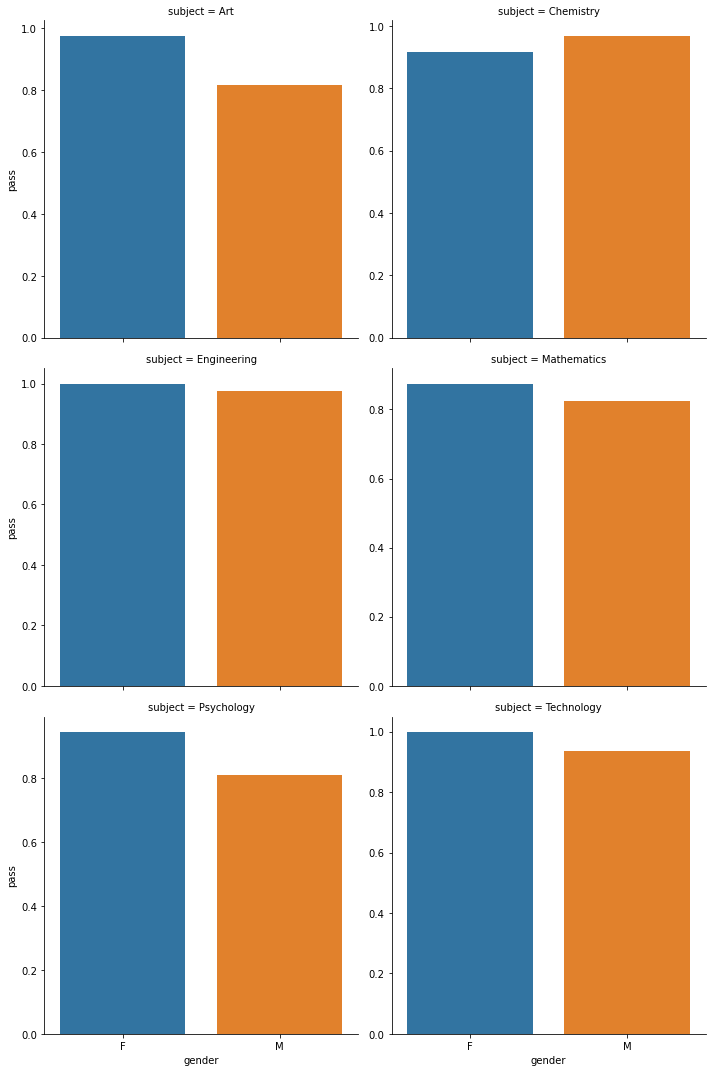

In [22]:
import seaborn as sns
sns.catplot(x='gender', y='pass', col='subject', data=yr2, col_wrap=2,sharey=False,kind='bar')


## Activity 3
### Exercise 2.2 Compare the year 1/year 2 performance in all subjects for each college

Approach:
* Reload the dataframe, this time using 3 level headers
* Reindex to make multiindex dataframe

In [67]:
#import csv as standard dataframe with 2 level header (rows 2&4)
grades = pd.read_csv('data/CollegeGrades1.csv', header=[0,2,4],skipinitialspace=True)
# display sample of frame




grades = apply_row_index(grades)
grades = apply_col_index(grades)

grades

Whitby                                                  \
                  Art                   Engineering                     
                    F     P     M     D           F     P     M     D   
course  gender                                                          
Year 1  M         0.0   5.0   7.0   9.0         2.0  18.0   5.0  10.0   
        F         0.0  13.0  14.0  11.0         0.0   6.0   8.0   6.0   
Year 2  M         5.0  10.0   6.0   6.0         1.0  20.0   5.0  18.0   
        F         1.0  11.0  14.0  15.0         0.0   9.0   9.0   2.0   
Evening M         4.0  10.0   6.0   5.0         3.0  13.0  19.0   5.0   
        F         4.0  12.0  12.0  13.0         0.0   9.0   3.0   8.0   

                                 ... Scarborough                             \
               Psychology        ...  Psychology      Chemistry               
                        F     P  ...           M    D         F     P     M   
course  gender                   ...                                          
Year 1  M             4.0   9.0  ...         6.0  2.0       0.0  10.0  11.0   
        F             2.0  12.0  ...        14.0  9.0      10.0  11.0  18.0   
Year 2  M             4.0   9.0  ...         6.0  2.0       1.0  13.0  15.0   
        F             2.0  12.0  ...        14.0  9.0       0.0  17.0  19.0   
Evening M             4.0   9.0  ...         6.0  2.0       8.0  12.0  16.0   
        F             2.0  12.0  ...        14.0  9.0       9.0  16.0  20.0   

                                                   
                     Technology                    
                   D          F     P     M     D  
course  gender                                     
Year 1  M       14.0        4.0  12.0  12.0   5.0  
        F       20.0        0.0   5.0   7.0   8.0  
Year 2  M       18.0        3.0  19.0   8.0  16.0  
        F       19.0        0.0   4.0   6.0   4.0  
Evening M       13.0        4.0  19.0  18.0   7.0  
        F       13.0        0.0  10.0   5.0   6.0  

[6 rows x 36 columns]

In [63]:


columns = pd.DataFrame(grades.columns.tolist())

    # replace any 'unnamed' columns with na



grades.columns = pd.MultiIndex.from_tuples(columns.to_records(index=False).tolist())
grades


Whitby                                                  \
                  Art                   Engineering                     
                    F     P     M     D           F     P     M     D   
course  gender                                                          
Year 1  M         0.0   5.0   7.0   9.0         2.0  18.0   5.0  10.0   
        F         0.0  13.0  14.0  11.0         0.0   6.0   8.0   6.0   
Year 2  M         5.0  10.0   6.0   6.0         1.0  20.0   5.0  18.0   
        F         1.0  11.0  14.0  15.0         0.0   9.0   9.0   2.0   
Evening M         4.0  10.0   6.0   5.0         3.0  13.0  19.0   5.0   
        F         4.0  12.0  12.0  13.0         0.0   9.0   3.0   8.0   

                                 ... Scarborough                             \
               Psychology        ...  Psychology      Chemistry               
                        F     P  ...           M    D         F     P     M   
course  gender                   ...                                          
Year 1  M             4.0   9.0  ...         6.0  2.0       0.0  10.0  11.0   
        F             2.0  12.0  ...        14.0  9.0      10.0  11.0  18.0   
Year 2  M             4.0   9.0  ...         6.0  2.0       1.0  13.0  15.0   
        F             2.0  12.0  ...        14.0  9.0       0.0  17.0  19.0   
Evening M             4.0   9.0  ...         6.0  2.0       8.0  12.0  16.0   
        F             2.0  12.0  ...        14.0  9.0       9.0  16.0  20.0   

                                                   
                     Technology                    
                   D          F     P     M     D  
course  gender                                     
Year 1  M       14.0        4.0  12.0  12.0   5.0  
        F       20.0        0.0   5.0   7.0   8.0  
Year 2  M       18.0        3.0  19.0   8.0  16.0  
        F       19.0        0.0   4.0   6.0   4.0  
Evening M       13.0        4.0  19.0  18.0   7.0  
        F       13.0        0.0  10.0   5.0   6.0  

[6 rows x 36 columns]

In [120]:
for idx, data in grades.groupby(level=[0],axis=0):
    print(data)   

               Whitby                                                 \
                  Art                   Engineering                    
                    F     P     M     D           F     P     M    D   
course  gender                                                         
Evening M         4.0  10.0   6.0   5.0         3.0  13.0  19.0  5.0   
        F         4.0  12.0  12.0  13.0         0.0   9.0   3.0  8.0   

                                 ... Scarborough                             \
               Psychology        ...  Psychology      Chemistry               
                        F     P  ...           M    D         F     P     M   
course  gender                   ...                                          
Evening M             4.0   9.0  ...         6.0  2.0       8.0  12.0  16.0   
        F             2.0  12.0  ...        14.0  9.0       9.0  16.0  20.0   

                                                  
                     Technology          

Bridlington                         Scarborough                        \
         Chemistry Engineering Mathematics   Chemistry Psychology Technology   
course                                                                         
Year 1       120.0        63.0       103.0        94.0       58.0       53.0   
Year 2       103.0        58.0       113.0       102.0       58.0       60.0   

       Whitby                         
          Art Engineering Psychology  
course                                
Year 1   59.0        55.0       58.0  
Year 2   68.0        64.0       58.0

In [204]:
grades_all = grades.groupby(level=0,axis=0).sum()
grades_all.drop('Evening',inplace=True)
grades_all

Whitby                                                             \
          Art                   Engineering                   Psychology   
            F     P     M     D           F     P     M     D          F   
course                                                                     
Year 1    0.0  18.0  21.0  20.0         2.0  24.0  13.0  16.0        6.0   
Year 2    6.0  21.0  20.0  21.0         1.0  29.0  14.0  20.0        6.0   

              ... Scarborough                                               \
              ...  Psychology       Chemistry                   Technology   
           P  ...           M     D         F     P     M     D          F   
course        ...                                                            
Year 1  21.0  ...        20.0  11.0      10.0  21.0  29.0  34.0        4.0   
Year 2  21.0  ...        20.0  11.0       1.0  30.0  34.0  37.0        3.0   

                          
                          
           P     M     D  
course                    
Year 1  17.0  19.0  13.0  
Year 2  23.0  14.0  20.0  

[2 rows x 36 columns]

In [191]:
for idx, data in grades_all.groupby(level=[0,1],axis=1):
    print(idx)

('Bridlington', 'Chemistry')
('Bridlington', 'Engineering')
('Bridlington', 'Mathematics')
('Scarborough', 'Chemistry')
('Scarborough', 'Psychology')
('Scarborough', 'Technology')
('Whitby', 'Art')
('Whitby', 'Engineering')
('Whitby', 'Psychology')


In [205]:

#    frame[(l,'P%')] = frame.apply(lambda x: x.loc[(l,['P','M','D'])].sum() / x.loc[(l,['F','P','M','D'])].sum(), axis=1)
grades_all[('Bridlington', 'Chemistry')]
grades_all.sort_index(axis=1,inplace=True)
grades_all

SpecificationError: nested renamer is not supported

In [243]:
grades_all[('Bridlington', 'Chemistry')]

F     P     M     D
course                        
Year 1  16.0  36.0  34.0  34.0
Year 2  11.0  36.0  29.0  27.0

In [268]:
g2 = grades_all.groupby(level=[0,1],axis=1).apply(lambda r: r.columns)
g2.unstack()mat

Art  \
Bridlington                                                NaN   
Scarborough                                                NaN   
Whitby       MultiIndex([('Whitby', 'Art', 'F'),
          ...   

                                                     Chemistry  \
Bridlington  MultiIndex([('Bridlington', 'Chemistry', 'F'),...   
Scarborough  MultiIndex([('Scarborough', 'Chemistry', 'F'),...   
Whitby                                                     NaN   

                                                   Engineering  \
Bridlington  MultiIndex([('Bridlington', 'Engineering', 'F'...   
Scarborough                                                NaN   
Whitby       MultiIndex([('Whitby', 'Engineering', 'F'),
  ...   

                                                   Mathematics  \
Bridlington  MultiIndex([('Bridlington', 'Mathematics', 'F'...   
Scarborough                                                NaN   
Whitby                                                     NaN   

                                                    Psychology  \
Bridlington                                                NaN   
Scarborough  MultiIndex([('Scarborough', 'Psychology', 'F')...   
Whitby       MultiIndex([('Whitby', 'Psychology', 'F'),
   ...   

                                                    Technology  
Bridlington                                                NaN  
Scarborough  MultiIndex([('Scarborough', 'Technology', 'F')...  
Whitby                                                     NaN